In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

data = pd.read_csv("data.csv")


$X' = a + (b-a) \frac{X-X_{min}}{X_{max} - X_{min}}$

In [3]:
def min_max_scale(data: pd.Series,a: int,b: int):
    data_max = np.max(data)
    data_min = np.min(data)
    return a + np.multiply((b-a),np.divide((data - data_min),(data_max - data_min)))

(array([  2.,   2.,   6.,   7.,  21.,  33.,  50.,  95., 119., 134., 112.,
        118.,  97.,  75.,  41.,  41.,  27.,  14.,   5.,   1.]),
 array([-30.05919046, -26.80619579, -23.55320112, -20.30020645,
        -17.04721178, -13.79421711, -10.54122245,  -7.28822778,
         -4.03523311,  -0.78223844,   2.47075623,   5.7237509 ,
          8.97674557,  12.22974024,  15.48273491,  18.73572958,
         21.98872425,  25.24171892,  28.49471359,  31.74770826,
         35.00070293]),
 <BarContainer object of 20 artists>)

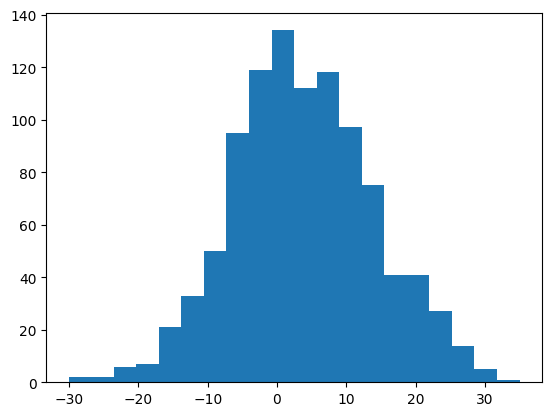

In [4]:
plt.hist(data["Column 1"],bins=20)

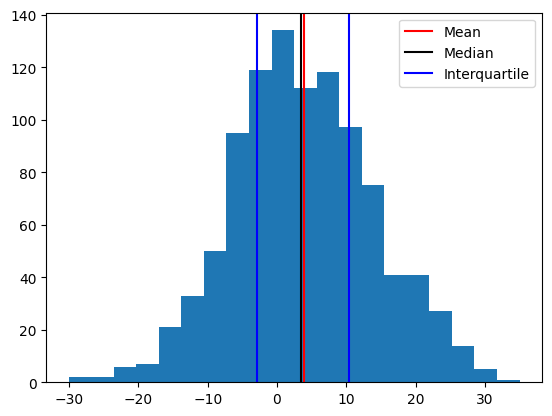

In [8]:
plt.hist(data["Column 1"], bins=20)
plt.axvline(x=data["Column 1"].mean(), c='red', label='Mean')
plt.axvline(x=data["Column 1"].median(), c='black', label='Median')
plt.axvline(x=np.quantile(data["Column 1"],q=0.25), c='blue', label='Interquartile')
plt.axvline(x=np.quantile(data["Column 1"],q=0.75), c='blue')
plt.legend()
plt.show()

In [7]:
np.quantile(data["Column 1"],q=0.25) 

-2.8635366572472813

In [9]:
data["Column 1"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Column 1
Non-Null Count  Dtype  
--------------  -----  
1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


In [10]:
min_max_scale(data["Column 1"],-3,3)

0     -0.341419
1      0.498320
2      0.986712
3      1.011817
4     -0.968684
         ...   
995   -0.845655
996    1.134935
997    0.438566
998   -1.218018
999   -0.731588
Name: Column 1, Length: 1000, dtype: float64

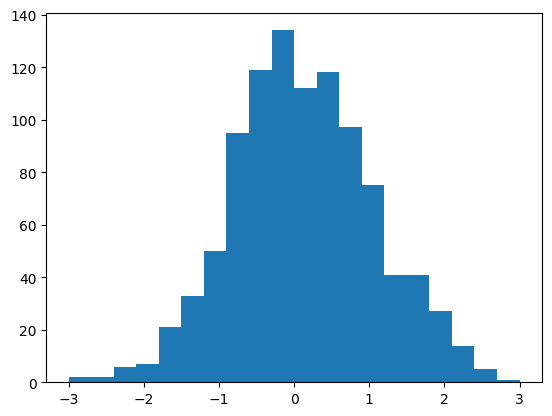

In [12]:
plt.hist(min_max_scale(data["Column 1"], -3, 3), bins=20);plt.show()

(array([58., 49., 75., 56., 46., 47., 56., 42., 44., 47., 49., 49., 42.,
        43., 45., 55., 55., 36., 51., 55.]),
 array([1.0002044 , 1.05008782, 1.09997124, 1.14985466, 1.19973808,
        1.24962149, 1.29950491, 1.34938833, 1.39927175, 1.44915517,
        1.49903859, 1.548922  , 1.59880542, 1.64868884, 1.69857226,
        1.74845568, 1.7983391 , 1.84822251, 1.89810593, 1.94798935,
        1.99787277]),
 <BarContainer object of 20 artists>)

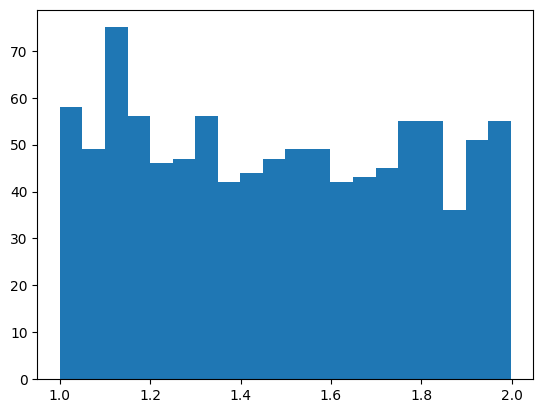

In [13]:
plt.hist(data["Column 2"],bins=20)

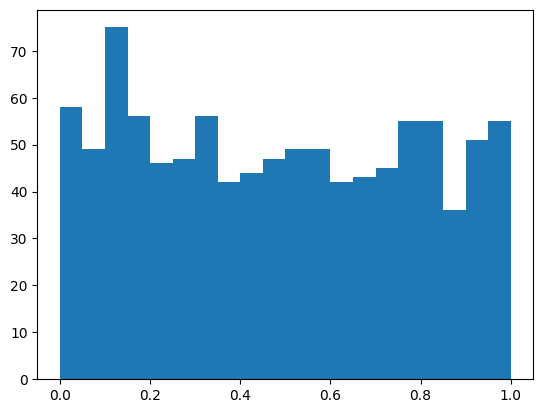

In [15]:
plt.hist(min_max_scale(data["Column 2"],0,1),bins=20);plt.show()

In [17]:
min_max_scale(data["Column 2"],0.08,1)

0      0.361913
1      0.348744
2      0.333378
3      0.586188
4      0.905354
         ...   
995    0.107769
996    0.699148
997    0.170685
998    0.187317
999    0.872962
Name: Column 2, Length: 1000, dtype: float64

###### Standard Scaler

$X' = \frac{X - \mu}{\sigma}$

In [18]:
#Applying the standard scaler
#scaled = (X - mean)/std

def standard_scale(X):
    return np.divide((X-X.mean()),np.std(X))

standard_scale(data["Column 2"])

0     -0.599478
1     -0.647633
2     -0.703818
3      0.220608
4      1.387674
         ...   
995   -1.528785
996    0.633660
997   -1.298725
998   -1.237906
999    1.269229
Name: Column 2, Length: 1000, dtype: float64

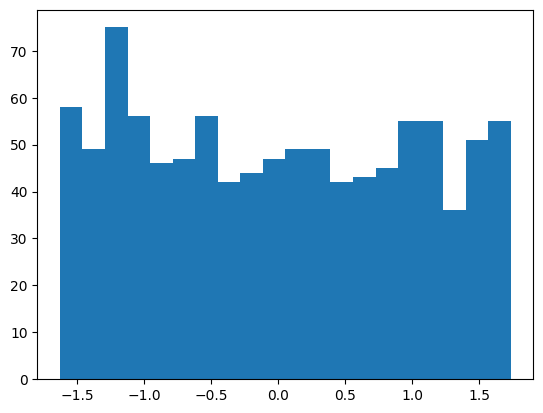

In [20]:
plt.hist(standard_scale(data["Column 2"]),bins=20);plt.show()

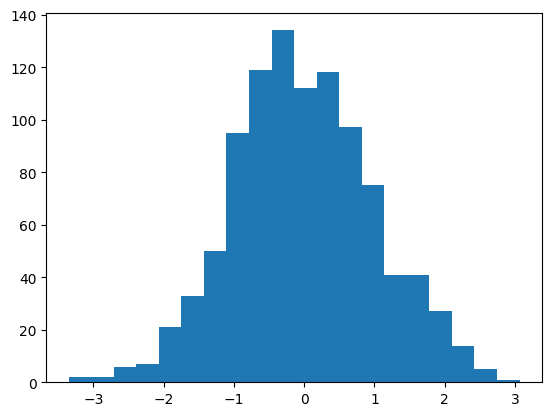

In [21]:
plt.hist(standard_scale(data["Column 1"]),bins=20);plt.show()

In [24]:
y = list(zip(min_max_scale(data["Column 1"],-3,3), standard_scale(data["Column 1"])))
y

[(-0.34141885212005496, -0.5081249231277782),
 (0.498319805710695, 0.38974058855850635),
 (0.9867118605111926, 0.911939225119724),
 (1.0118165931129166, 0.9387817116159649),
 (-0.968683545845499, -1.17880898648794),
 (-0.3068509523866907, -0.47116422744872694),
 (-0.6419274310079635, -0.8294347573639573),
 (-0.7982770735643472, -0.9966069489818754),
 (1.7475370726171064, 1.7254288888395828),
 (-0.4574407376426137, -0.6321778634564051),
 (-1.4430237697874686, -1.6859831220496289),
 (0.932541932632283, 0.8540196455464216),
 (0.8616502741286611, 0.7782208542878762),
 (1.1545537134971315, 1.0913991199432955),
 (1.3352711733393612, 1.2846258733370801),
 (-0.7991040793591293, -0.9974912002595498),
 (-1.7651381562919937, -2.0303943216096356),
 (1.391626867527858, 1.3448825183386357),
 (1.1761152818218878, 1.1144531837238973),
 (-0.9312867439901926, -1.1388235715970936),
 (1.8603015553016844, 1.8459989483473513),
 (-0.4941218564107541, -0.6713980555540995),
 (-0.4658136561215449, -0.6411303567

In [25]:
data["Column 1"].sample(10)

9      -2.489418
925     5.880517
899     6.403659
393     4.821237
488     1.580337
148    11.701076
116    14.438656
339     3.890172
864    -1.673582
755    13.458365
Name: Column 1, dtype: float64

In [26]:
data["Column 1"].sample(10)

166    -1.805052
730     8.958787
251   -19.279517
407    14.861819
513   -14.351626
957    12.452997
193    -5.416511
307    -9.534659
150    -7.049375
707     8.705178
Name: Column 1, dtype: float64

In [48]:
from scipy.stats import ttest_ind
x = data["Column 1"].sample(10)
y = data["Column 1"].sample(10)
ttest_ind(x,y).pvalue

0.4892953206141363

In [49]:
len(data["Column 1"])

1000

In [50]:
val = []
for i in range(20000):
    p = ttest_ind(data["Column 1"].sample(10),data["Column 1"].sample(10)).pvalue
    if p < 0.05:
        val.append(p)
len(val)

981

In [51]:
print(data["Column 1"].mean(),data["Column 3"].mean())

3.921706863148459 0.29001254279455363


In [54]:
# using different columns of definitely different means
vals = []
for i in range(20000):
    p = ttest_ind(data["Column 1"].sample(10),data["Column 3"].sample(10)).pvalue
    if p < 0.05:
        vals.append(p)
len(vals)

4017

In [53]:
len(val)-981

3962

In [55]:
"""
It appears that to obtain a sample that is
representative of the population is quite
difficult if a small sample size is used.
"""

'\nIt appears that to obtain a sample that is representative of the population is quite difficult if a small samplesize is used\n'